In [84]:
from udacidrone import Drone
from udacidrone.connection import MavlinkConnection
conn = MavlinkConnection('tcp:127.0.0.1:5760', threaded=True)
drone = Drone(conn)

[Errno 61] Connection refused sleeping
[Errno 22] Invalid argument sleeping


OSError: [Errno 22] Invalid argument

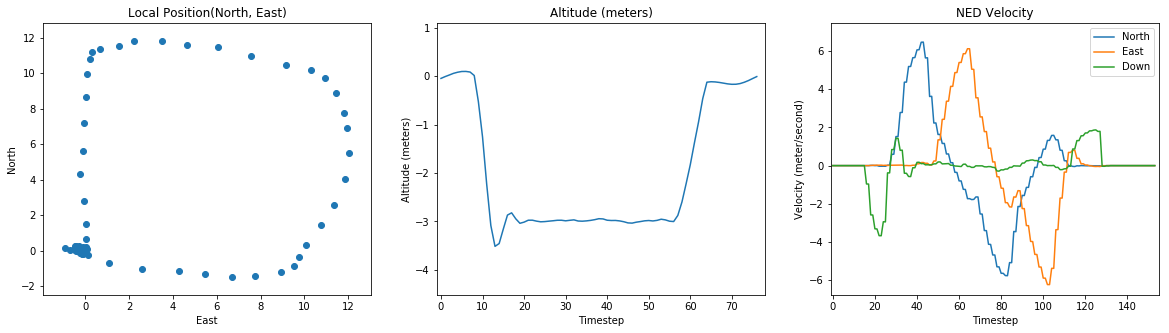

In [102]:
import matplotlib.pyplot as plt

def visualize(filename, local_position='MsgID.LOCAL_POSITION', velocity='MsgID.LOCAL_VELOCITY'):
    t_log = drone.read_telemetry_data(filename)
    
    f, axs = plt.subplots(1,3,figsize=(20,5))
    north = t_log[local_position][1][:]
    east = t_log[local_position][2][:]
    axis_margin = 1
    plt.subplot(131)
    plt.scatter(east, north)
    plt.axis([min(east) - axis_margin, max(east) + axis_margin, min(north) - axis_margin, max(north) + axis_margin])
    plt.ylabel('North')
    plt.xlabel('East')
    plt.title('Local Position(North, East)')
    
    altitude = t_log[local_position][3][:]
    plt.subplot(132)
    plt.axis([0 - axis_margin, len(altitude) + axis_margin, min(altitude) - axis_margin, max(altitude) + axis_margin])
    plt.ylabel('Altitude (meters)')
    plt.xlabel('Timestep')
    plt.title('Altitude (meters)')
    plt.plot(altitude)
    
    north_velocity = t_log[velocity][1][:]
    east_velocity = t_log[velocity][2][:]
    down_velocity = t_log[velocity][3][:]
    plt.subplot(133)
    plt.axis([0 - axis_margin, len(north_velocity) + axis_margin, min(north_velocity) - axis_margin, max(north_velocity) + axis_margin])
    plt.plot(north_velocity, label="North")
    plt.plot(east_velocity, label="East")
    plt.plot(down_velocity, label="Down")
    plt.legend(loc=1)
    plt.ylabel('Velocity (meter/second)')
    plt.xlabel('Timestep')
    plt.title('NED Velocity')

visualize('Logs/TLog-auto.txt')

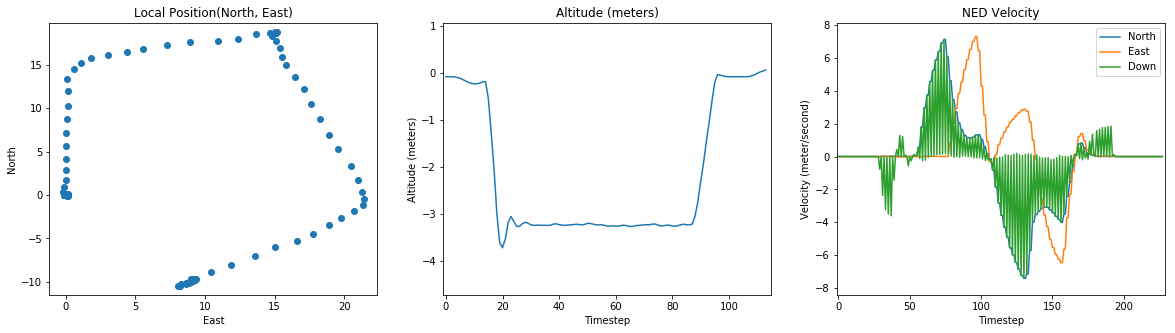

In [105]:
visualize('Logs/TLog-manual.txt', local_position='local_position_msg', velocity='local_velocity_msg')